# Text Analysis

In [200]:
search_term_on_twitter="""'bacon'"""
#date format of YYYY-MM-DD
search_start_date='2018-01-25'
search_end_date='2018-02-04'
file_name=search_term_on_twitter.replace("'","").replace(" ","")+'_'+datetime.datetime.now().strftime('%Y_%m_%d_%H-%M-%S').replace(" ","")
file_path_on_system_to_store_twitterdata='/Users/ramcharankakarla/Desktop/Medium/Text_Mining/'

In [201]:
os.system("cd "+file_path_on_system_to_store_twitterdata)
search_twitter_data='twitterscraper '+search_term_on_twitter+' -bd '+search_start_date+' -ed '+search_end_date+' -l 5000 --lang en -o '+file_name+'.json'
os.system(search_twitter_data)

0

In [202]:
import codecs, json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from os import path
from wordcloud import WordCloud,STOPWORDS
input_file_for_analysis=file_path_on_system_to_store_twitterdata+file_name+'.json'


with codecs.open(input_file_for_analysis, 'r', 'utf-8') as f:
    tweets = json.load(f, encoding='utf-8')

list_tweets = [list(elem.values()) for elem in tweets]
list_columns = list(tweets[0].keys())
df = pd.DataFrame(list_tweets, columns=list_columns)
#df=pd.read_json(input_file_for_analysis)

# Data cleaning 

In [203]:
df_text_data=df['text'].values
sentences_in_data=list(df_text_data)
cleaned_sentences=[]
for text in range(0,len(sentences_in_data)-1):
    cleaned_sentences.append(sentences_in_data[text].encode('utf-8'))   

# Implementing Vader

In [204]:
data_holder=[]
analyzer=SentimentIntensityAnalyzer()
for text in cleaned_sentences:
    vs=analyzer.polarity_scores(str(text))
    data_holder.append(vs)
 
word_cloud_data=''.join(str(cleaned_sentences))




In [197]:
rep = re.compile(r"""
                    http[s]?://.*?\s
                    |www.*?\s
                    |(\n)
                    """, re.X)
non_asc = re.compile(r"[^\x00-\x7F]")
non = non_asc.search(word_cloud_data)
m = rep.search(word_cloud_data)
if m:
    word_cloud_data = word_cloud_data.replace(m.group(), "")
    if word_cloud_data.strip():
        print(word_cloud_data.strip())

[b'eu acabei de comer um x bacon e quero outro', b'coloca bacon e Nutella entao *-*', b"On Friday, February 9th, the trio is playing @Taubman_Museum for their 'Bourbon + Bacon' event! It's bound to be a great time, so get your tix! b'just rub a little bacon grease on your lips for a soothing sensation', b'1- Ricos en fibra: Vegetales, frutas, arroz integral, avena, germen de trigo, salvado de trigo, frutas secas, frutas desecadas.\n- Ricos en Omega 3: Pescados de mar (arenque, anchoa o boquer\xc3\xb3n, anguila, at\xc3\xban, trucha, salm\xc3\xb3n, caballa, sardina, bac\xc3\xb3n, congrio, mariscos en general). pic.twitter.com/71ZPOmxXJL', b'No surprise at all that this guy in a \xe2\x80\x9c#meninist\xe2\x80\x9d hoodie in front of me at McDonald\xe2\x80\x99s is trying to ask the cashier for extra bacon in his premade burrito', b'I am sooo confused.\nis it a yeen\nis is a doggo\nis it bacon\nI am soooo confused\n~FLAILS~', b'Y las de bacon o jam\xc3\xb3n ', b'It\xe2\x80\x99s a bitch, that\

In [215]:
text = re.sub(r'(?:(?:http|https):\/\/)?([-a-zA-Z0-9.]{2,256}\.[a-z]{2,4})\b(?:\/[-a-zA-Z0-9@:%_\+.~#?&//=]*)?',"",word_cloud_data,flags=re.MULTILINE) 
text = '\n'.join([a for a in text.split("\n") if a.strip()]) 



In [216]:
text

'[b\'Avocado was the chose one \\n#aguacate #avocado #egg #bacon #eggsandbacon #poo #toiletpaper\\xe2\\x80\\xa6 \\xc2\\xa0\', b\'Not a dem  and we will see \', b\'Shut yo mouth, bacon! #TheMick\', b\'Drove to Slice N Pints at Emory Village only to find out they closed a month ago  I wanted some bacon knots!!! I am heartbroken\', b"Update on Duke: He is super spoiled and loves to pretend he can\'t jump on my bed. He loves going on our walks and trying to chase the squirrels and he loves bacon treats and going to eat with momma!!:)", b\'Bacon\\n#LouisTomlinson #BestSoloBreakout #iHeartAwards\', b\'BACON BACON BACON!!!!\', b\'+ bacon + cheddar extra\', b\'Bacon donuts? Fried in bacon grease?\', b\'Live! Berkshire Bacon Lover Live Food Review & Hang Out \\xc2\\xa0\\xe2\\x80\\xa6 via @YouTube\', b\'I stick a slice if jalapeno under the bacon and dip them in cheese sauce \\xc2\\xa0\', b\'Slipped and almost fell on a very big rock.\\nCouldve easily bruised a rib if I fell on the rock but I di

In [172]:
import re
word_cloud_data = re.sub(r'^https?:\/\/.*[\r\n]*', '', word_cloud_data, flags=re.MULTILINE)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ramcharankakarla/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


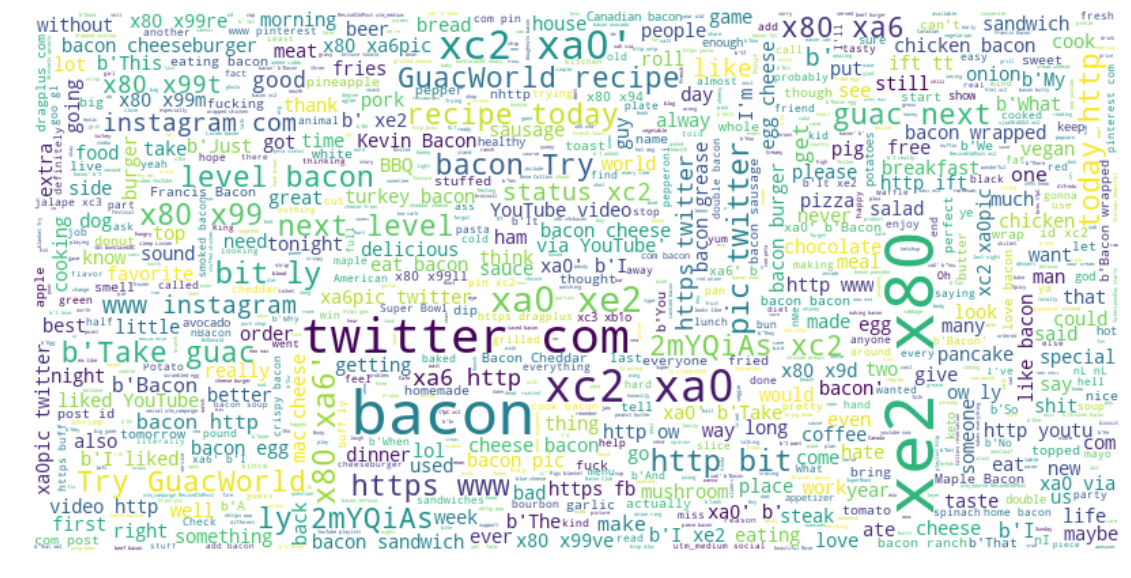

In [205]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
stopwords=set(stop)
wordcloud=WordCloud(width=800, height=400, background_color="white",max_font_size=50,stopwords=stopwords,max_words=2000).generate(word_cloud_data)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [212]:
temp_holder=pd.DataFrame(data_holder)
twitter_senti_data_by_day=pd.concat([df,temp_holder],axis=1,join='inner')
#twitter_senti_data_by_day['date_holder']=twitter_senti_data_by_day['timestamp'].dt.date
twitter_senti_data_by_day['date_holder']=pd.to_datetime(twitter_senti_data_by_day['timestamp'], errors='coerce')
sentiment_on_each_day=twitter_senti_data_by_day.groupby(['date_holder'],as_index=False).mean()


# Sentiment Analysis

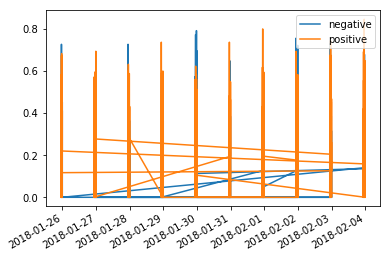

In [213]:
plt.plot(twitter_senti_data_by_day.date_holder,twitter_senti_data_by_day.neg)
plt.gcf().autofmt_xdate()
plt.plot(twitter_senti_data_by_day.date_holder,twitter_senti_data_by_day.pos)
plt.gcf().autofmt_xdate()
plt.legend(['negative','positive'],loc='upper right')
plt.show()

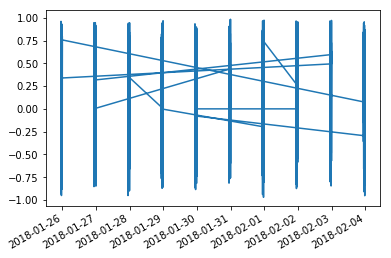

In [214]:
plt.plot(twitter_senti_data_by_day.date_holder,twitter_senti_data_by_day['compound'])
plt.gcf().autofmt_xdate()
plt.show()